# Exercise 2

The aim of this exercise is to compare CNN with an MLP.
For the first part we will use the previous (exercise 1)

## Import Library and Data

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.1.0+cu118
torchvision version: 0.16.0+cu118


In [2]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [3]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:02<00:00, 12368873.62it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 217744.41it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3904133.46it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 23520998.90it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



## Look at data

In [4]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
image.shape

torch.Size([1, 28, 28])

In [6]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [7]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

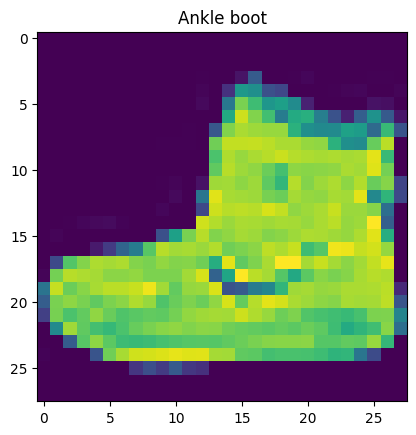

In [8]:
import matplotlib.pyplot as plt

plt.imshow(image.squeeze())
plt.title(class_names[label]);

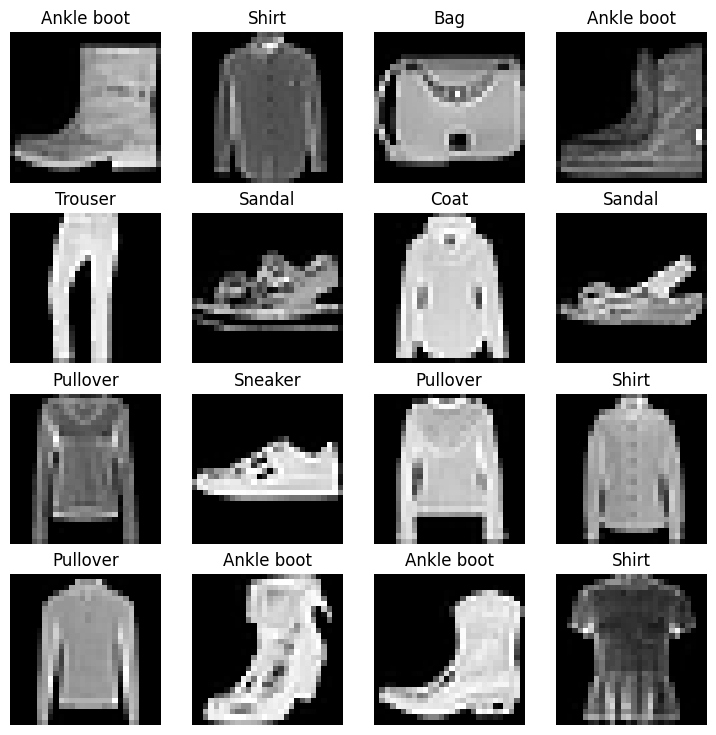

In [9]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4

for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

## DataLoader



In [10]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x79bee3eb9bd0>, <torch.utils.data.dataloader.DataLoader object at 0x79bee3eba380>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [11]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

## Build a model

In [12]:
input_shape = 784   # -> 28*28
hidden_units = 10
output_shape = len(class_names)

In [13]:
model_0 = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

We add 2 Relu layers to create a non-linear model

In [14]:
model_1 = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

## loss, optimizer and evaluation metrics

In [15]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 6.0 MB/s eta 0:00:00


In [16]:
import torchmetrics

accuracy_fn = torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names))

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

## Creating a training loop and training a model on batches of data

In [17]:
from tqdm.auto import tqdm  # progress bar

def train_step(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, optimizer: torch.optim.Optimizer, accuracy_fn):
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(data_loader):

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y, y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader, model: torch.nn.Module, loss_fn: torch.nn.Module, accuracy_fn):
    test_loss, test_acc = 0, 0
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y, test_pred.argmax(dim=1))

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [18]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(model = model_0, data_loader = train_dataloader, loss_fn = loss_fn, optimizer = optimizer, accuracy_fn = accuracy_fn)
    test_step(data_loader=test_dataloader, model=model_0, loss_fn=loss_fn, accuracy_fn=accuracy_fn)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.58956 | Train accuracy: 0.79%
Test loss: 0.54379 | Test accuracy: 0.80%

Epoch: 1
---------
Train loss: 0.47484 | Train accuracy: 0.83%
Test loss: 0.48466 | Test accuracy: 0.83%

Epoch: 2
---------
Train loss: 0.45493 | Train accuracy: 0.84%
Test loss: 0.52166 | Test accuracy: 0.81%



Model_1

In [19]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(model = model_1, data_loader = train_dataloader, loss_fn = loss_fn, optimizer = optimizer, accuracy_fn = accuracy_fn)
    test_step(data_loader=test_dataloader, model=model_1, loss_fn=loss_fn, accuracy_fn=accuracy_fn)



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.63742 | Train accuracy: 0.78%
Test loss: 0.50932 | Test accuracy: 0.81%

Epoch: 1
---------
Train loss: 0.46655 | Train accuracy: 0.83%
Test loss: 0.48071 | Test accuracy: 0.82%

Epoch: 2
---------
Train loss: 0.43620 | Train accuracy: 0.84%
Test loss: 0.45584 | Test accuracy: 0.84%



## Make predictions and get Model results

In [20]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
      for X, y in data_loader:
          # Make predictions with the model
          y_pred = model(X)

          # Accumulate the loss and accuracy values per batch
          loss += loss_fn(y_pred, y)
          acc += accuracy_fn(y, y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

      # Scale loss and acc to find the average loss/acc per batch
      loss /= len(data_loader)
      acc /= len(data_loader)

  return {"model_loss": loss.item(), "model_acc": acc}

In [21]:
# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_0_results

{'model_loss': 0.5216610431671143, 'model_acc': tensor(0.8143)}

In [22]:
# Calculate model 0 results on test dataset
model_1_results = eval_model(model=model_1, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_1_results

{'model_loss': 0.4558436870574951, 'model_acc': tensor(0.8429)}

# CNN

In [23]:
model_2 = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3, stride=1, padding=1),    # Input: 28x28, Output: 10x28x28
    nn.MaxPool2d(kernel_size=2, stride=2),                                            # Input: 10x28x28, Output: 10x14x14
    nn.Conv2d(in_channels=10, out_channels=10, kernel_size=3, stride=1, padding=1),   # Input: 10x14x14, Output: 10x14x14
    nn.MaxPool2d(kernel_size=2, stride=1),                                            # Input: 10x14x14, Output: 10x13x13
    nn.Flatten(),
    nn.Linear(in_features=10 * 13 * 13, out_features=len(class_names))                # Input: 10x13x13, Output: 10
  )

In [24]:
model_2

Sequential(
  (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (4): Flatten(start_dim=1, end_dim=-1)
  (5): Linear(in_features=1690, out_features=10, bias=True)
)

In [25]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [26]:
# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, model=model_2, loss_fn=loss_fn, optimizer=optimizer, accuracy_fn=accuracy_fn)
    test_step(data_loader=test_dataloader, model=model_2, loss_fn=loss_fn, accuracy_fn=accuracy_fn)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.45515 | Train accuracy: 0.84%
Test loss: 0.41088 | Test accuracy: 0.85%

Epoch: 1
---------
Train loss: 0.33067 | Train accuracy: 0.88%
Test loss: 0.33723 | Test accuracy: 0.88%

Epoch: 2
---------
Train loss: 0.29527 | Train accuracy: 0.90%
Test loss: 0.33335 | Test accuracy: 0.88%



In [27]:
model_2_results = eval_model(model=model_2, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_2_results

{'model_loss': 0.3333500027656555, 'model_acc': tensor(0.8808)}

## Build a Complex CNN

The CNN model we're going to be using is known as TinyVGG from the CNN Explainer website.

https://poloclub.github.io/cnn-explainer/

In [28]:
# Create a convolutional neural network
class FashionMNISTModelCNN(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3,stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)

        return x

In [29]:
torch.manual_seed(42)
model_3 = FashionMNISTModelCNN(input_shape=1, hidden_units=10, output_shape=len(class_names))
model_3

FashionMNISTModelCNN(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [30]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.1)

In [31]:
# Train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, model=model_3, loss_fn=loss_fn, optimizer=optimizer, accuracy_fn=accuracy_fn)
    test_step(data_loader=test_dataloader, model=model_3, loss_fn=loss_fn, accuracy_fn=accuracy_fn)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.57716 | Train accuracy: 0.79%
Test loss: 0.39148 | Test accuracy: 0.86%

Epoch: 1
---------
Train loss: 0.35641 | Train accuracy: 0.87%
Test loss: 0.37143 | Test accuracy: 0.86%

Epoch: 2
---------
Train loss: 0.31685 | Train accuracy: 0.89%
Test loss: 0.33307 | Test accuracy: 0.88%



In [32]:
model_3_results = eval_model(model=model_3, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_3_results

{'model_loss': 0.33307161927223206, 'model_acc': tensor(0.8775)}

## 8. Compare model results


In [33]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results, model_3_results])
compare_results

,model_loss,model_acc
0,0.521661,tensor(0.8143)
1,0.455844,tensor(0.8429)
2,0.333350,tensor(0.8808)
3,0.333072,tensor(0.8775)


We see better result with the CNN model

 ## Make and evaluate random prediction with the CNN model

In [34]:
def make_predictions(model: torch.nn.Module, data: list):
    pred_probs = []
    model.eval()

    with torch.inference_mode():
        for sample in data:

            sample = torch.unsqueeze(sample, dim=0)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            pred_probs.append(pred_prob)

    return torch.stack(pred_probs)

In [35]:
import random

random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

In [36]:
# Make predictions on test samples with model 3
pred_probs = make_predictions(model=model_3, data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[1.1767e-08, 8.6203e-11, 1.8827e-10, 5.5265e-10, 5.2426e-09, 9.9995e-01,
         1.7953e-07, 1.2662e-07, 8.4186e-07, 5.2721e-05],
        [5.1035e-01, 3.0239e-01, 1.1327e-03, 4.9038e-02, 4.7023e-02, 2.9895e-05,
         8.9492e-02, 1.1676e-04, 3.9674e-04, 3.1374e-05]])

In [37]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 0, 7, 4, 3, 0, 4, 7, 1])

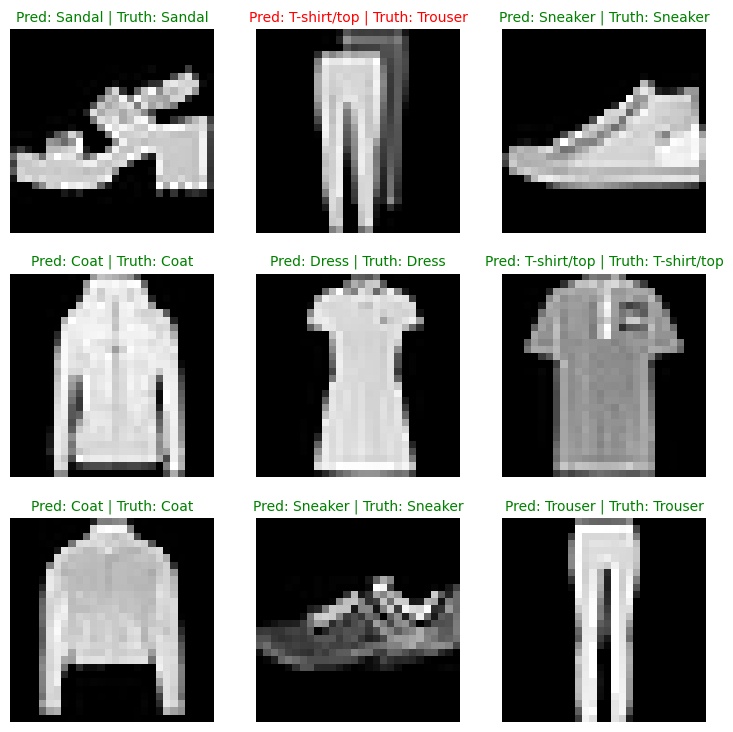

In [38]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  pred_label = class_names[pred_classes[i]]
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

## Confusion matrix

In [41]:
# 1. Make predictions with trained model
y_preds = []
model_2.eval()

with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Do the forward pass
    y_logit = model_3(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    y_preds.append(y_pred)

# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

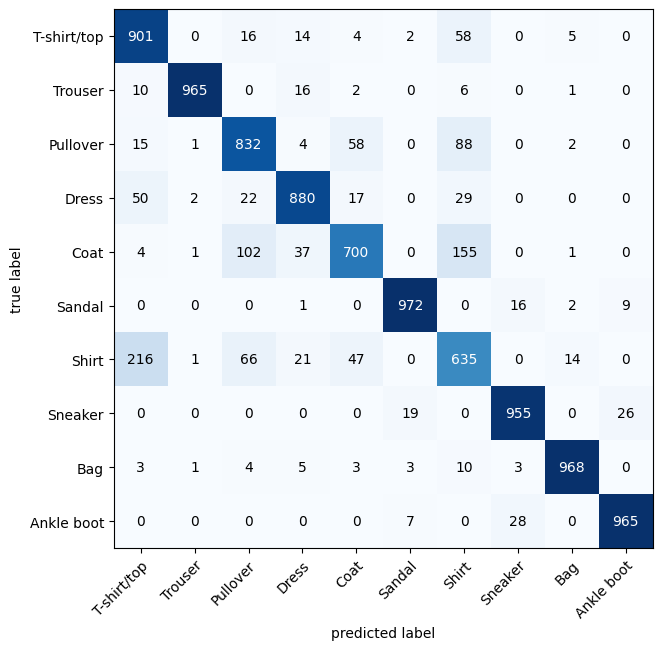

In [42]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix( conf_mat=confmat_tensor.numpy(), class_names=class_names, figsize=(10, 7));